In [40]:
%matplotlib inline

In [45]:
import os
import json
from datetime import datetime
import pandas as pd
from matplotlib.colors import ListedColormap
import calplot

In [2]:
nomie3_file_name = os.path.join('..', 'raw-data', 'nomie.csv')

In [29]:
nomie_df = pd.read_csv(nomie3_file_name, date_parser=['start', 'end'])
nomie_df = nomie_df[nomie_df['emoji'].isin(['🍺', '🥂', '🍷', '🥃', '🚬', '🍸'])]
nomie_df

,epoch,start,end,tracker,uom,emoji,value,note,lat,lng,location
0,1670715213750,2022-12-10 18:33:32,2022-12-10 18:33:33,beer,num,🍺,1.0,#beer(1),38.893352,-77.075535,NaN
1,1670632451981,2022-12-09 19:34:10,2022-12-09 19:34:11,coctail,num,🍸,1.0,#coctail(1),38.893315,-77.075428,NaN
2,1670627511097,2022-12-09 18:11:50,2022-12-09 18:11:51,coctail,num,🍸,1.0,#coctail(1),38.893367,-77.075557,NaN
3,1670287657759,2022-12-05 19:47:36,2022-12-05 19:47:37,wine,num,🍷,1.0,#wine(1),38.893404,-77.075616,NaN
4,1670283068072,2022-12-05 18:31:07,2022-12-05 18:31:08,wine,num,🍷,1.0,#wine(1),38.893443,-77.075639,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3289,1577825540000,2019-12-31 15:52:20,2019-12-31 15:52:20,coctail,num,🍸,1.0,#coctail(1),50.221566,12.881070,NaN
3290,1577825240000,2019-12-31 15:47:20,2019-12-31 15:47:20,champagne,num,🥂,1.0,#champagne(1),50.221566,12.881070,NaN
3291,1577823500000,2019-12-31 15:18:20,2019-12-31 15:18:20,champagne,num,🥂,1.0,#champagne(1),50.221566,12.881070,NaN
3292,1577821640000,2019-12-31 14:47:20,2019-12-31 14:47:20,champagne,num,🥂,1.0,#champagne(1),50.221566,12.881070,NaN


In [30]:
nomie_df['date'] = nomie_df.apply(lambda row: pd.to_datetime(row['start']).floor('D'), axis=1)
nomie_df

,epoch,start,end,tracker,uom,emoji,value,note,lat,lng,location,date
0,1670715213750,2022-12-10 18:33:32,2022-12-10 18:33:33,beer,num,🍺,1.0,#beer(1),38.893352,-77.075535,NaN,2022-12-10
1,1670632451981,2022-12-09 19:34:10,2022-12-09 19:34:11,coctail,num,🍸,1.0,#coctail(1),38.893315,-77.075428,NaN,2022-12-09
2,1670627511097,2022-12-09 18:11:50,2022-12-09 18:11:51,coctail,num,🍸,1.0,#coctail(1),38.893367,-77.075557,NaN,2022-12-09
3,1670287657759,2022-12-05 19:47:36,2022-12-05 19:47:37,wine,num,🍷,1.0,#wine(1),38.893404,-77.075616,NaN,2022-12-05
4,1670283068072,2022-12-05 18:31:07,2022-12-05 18:31:08,wine,num,🍷,1.0,#wine(1),38.893443,-77.075639,NaN,2022-12-05
...,...,...,...,...,...,...,...,...,...,...,...,...
3289,1577825540000,2019-12-31 15:52:20,2019-12-31 15:52:20,coctail,num,🍸,1.0,#coctail(1),50.221566,12.881070,NaN,2019-12-31
3290,1577825240000,2019-12-31 15:47:20,2019-12-31 15:47:20,champagne,num,🥂,1.0,#champagne(1),50.221566,12.881070,NaN,2019-12-31
3291,1577823500000,2019-12-31 15:18:20,2019-12-31 15:18:20,champagne,num,🥂,1.0,#champagne(1),50.221566,12.881070,NaN,2019-12-31
3292,1577821640000,2019-12-31 14:47:20,2019-12-31 14:47:20,champagne,num,🥂,1.0,#champagne(1),50.221566,12.881070,NaN,2019-12-31


In [66]:
def plot_my_fun(df):
    fun_by_date_df = df.groupby(['date']).count().reset_index()[['date', 'tracker']]
    fun_by_date_series = pd.Series(fun_by_date_df['tracker'].values, index=fun_by_date_df['date'])
    max_fun_per_day = max(fun_by_date_series)
    limit_good = 1
    limit_ok = 3
    booze_cmap = ListedColormap(['#99ff66'] * limit_good
                                + ['#f8e447'] * limit_ok
                                + ['#f3a0bc'] * (max_fun_per_day - limit_good - limit_ok))
    calplot.calplot(fun_by_date_series,
                    textformat='{:.0f}',
                    textcolor='#999999',
                    cmap=booze_cmap,
                    linewidth=0.0005,
                    edgecolor='white'
                   )

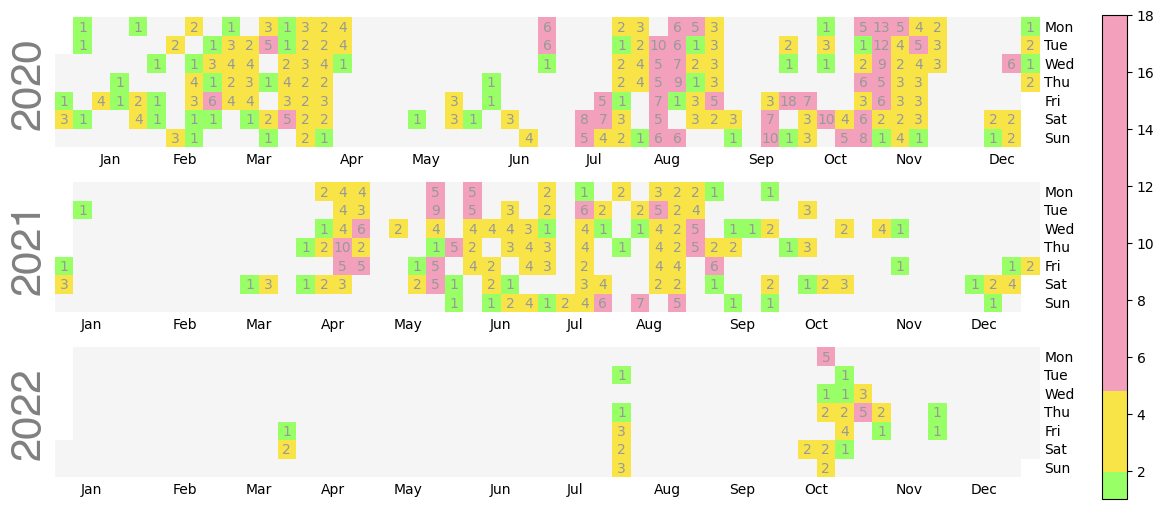

In [68]:
plot_my_fun(nomie_df[nomie_df['emoji'].isin(['🚬'])])

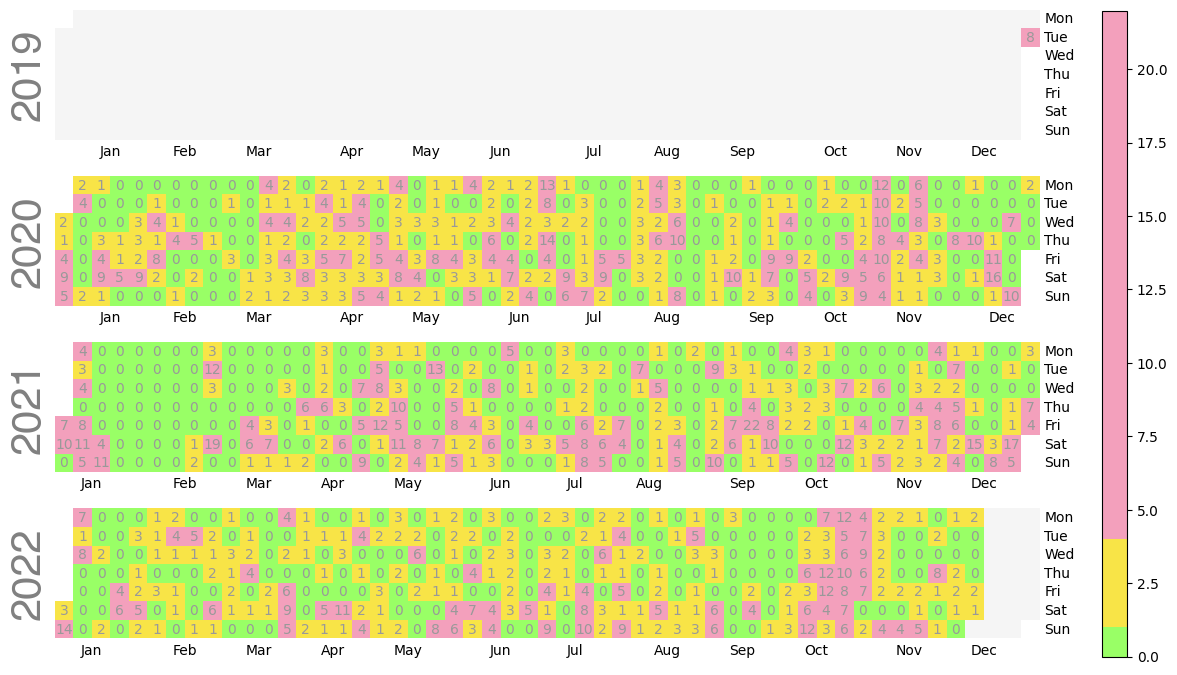

In [69]:
plot_my_fun(nomie_df[nomie_df['emoji'].isin(['🍺', '🥂', '🍷', '🥃', '🍸'])])